In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree._tree import TREE_LEAF
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import export_graphviz
import graphviz

def confirmation_calc(clf, i):
    # Получаем значение value для узла i
    node_values = clf.tree_.value[i][0]
    #print(node_values)
    
    # Вычисляем отношение максимального значения к сумме значений
    accuracy = max(node_values) / sum(node_values)
    
    return accuracy


def tree_trace(tree, id):
    left = tree.children_left
    right = tree.children_right
    threshold = tree.threshold
    features = tree.feature
    
    path = []
    
    # Функция для рекурсивного обхода дерева в обратном порядке (от листа к корню)
    def recurse(node):
        if node == 0:  # корень дерева
            return
        # Проверяем, является ли текущая вершина левым потомком своего родителя
        if any(left == node):
            parent = list(left).index(node)
#             print("parent", parent)
            path.append((features[parent], '<=', threshold[parent]))
        # Иначе вершина является правым потомком
        else:
            parent = list(right).index(node)
#             print("parent", parent)
            path.append((features[parent], '>', threshold[parent]))
        recurse(parent)
    
    recurse(id)
    return list(reversed(path))


In [98]:
# Загрузка данных
df = pd.read_csv('student\\student-mat.csv', sep=';')
# Удаление столбцов G1 и G2
df = df.drop(columns=['G1', 'G2'])
# Преобразование строковых данных и создание признаков на основе категориальных переменных
ix = pd.get_dummies(df.drop(columns=['G3']))

In [99]:
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

In [100]:
# print(bins)
# print(clf)
print(ix)
# print(ix.head())

     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0        4     1  

In [101]:
# Разбиение столбца G3 на интервалы
bins = pd.cut(df['G3'], bins=[-1, 4, 9, 14, 20], labels=[1, 2, 3, 4], right=True)
y = bins.astype('int')

In [102]:
print(bins)

0      2
1      2
2      3
3      4
4      3
      ..
390    2
391    4
392    2
393    3
394    2
Name: G3, Length: 395, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [103]:
# Создание и обучение классификатора на основе решающего дерева
clf = DecisionTreeClassifier(max_depth=7, random_state=0)
clf.fit(ix, y)
col_arr = np.array(ix.columns)
# print(ix.columns)
col_list = col_arr.tolist()
print(col_list)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


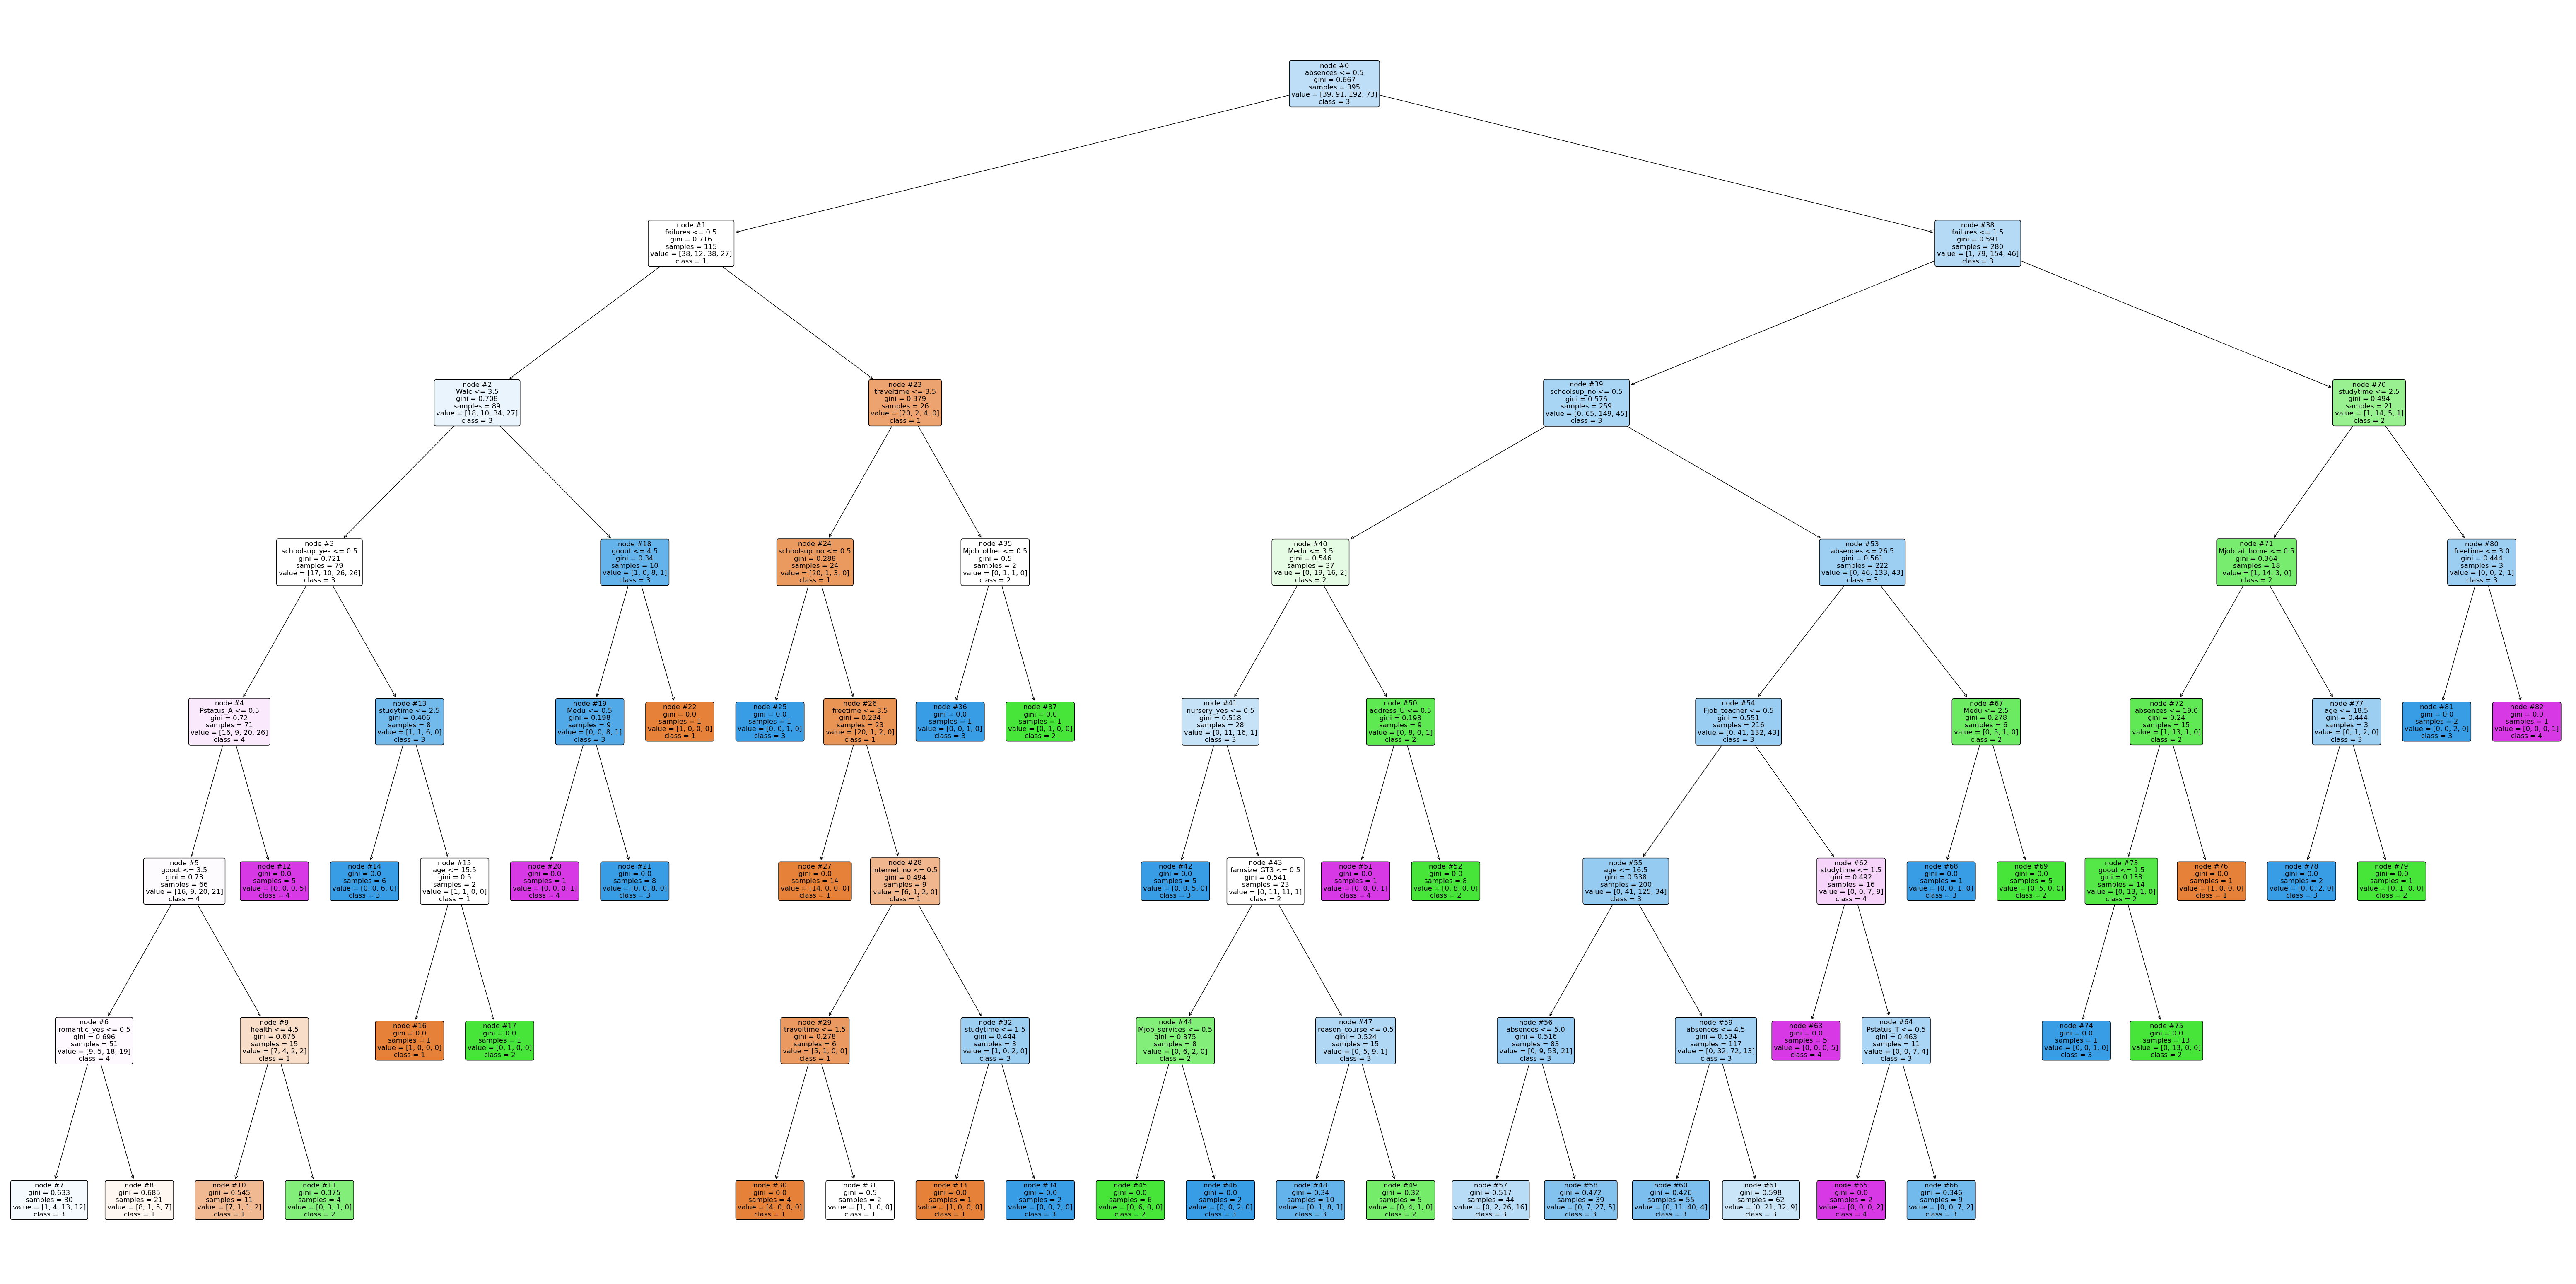

In [104]:
# Визуализация дерева
plt.figure(figsize=(80, 40))
plot_tree(clf, feature_names=col_list, filled=True, rounded=True, node_ids = True, class_names=["1", "2", "3", "4"])
plt.savefig("decision_tree_depth_7.png")
plt.show()

In [111]:
tree_path = tree_trace(clf.tree_, 73)

for feature, sign, num in tree_path:
    print(f"Feature: {ix.columns[feature]}, Condition: {sign} {num}")

print(f"Accuracy:  {confirmation_calc(clf, 73)}" )

parent 72
parent 71
parent 70
parent 38
parent 0
Feature: absences, Condition: > 0.5
Feature: failures, Condition: > 1.5
Feature: studytime, Condition: <= 2.5
Feature: Mjob_at_home, Condition: <= 0.5
Feature: absences, Condition: <= 19.0
Accuracy:  0.9285714285714286
